# Defining usueful classes

In [20]:
trie_miss_count = 0
class Trie:
    """ This class itself act as a node in Trie. """
    def __init__(self):
        self.count = 0
        self.isword = False
        self.childrens = {}
        self.heap_index = -1

    def insert(self, word, input_word, mHeap):
        """ Insert method inserts a string  into the trie. """
        if len(word) == 0:
            self.isword = True
            self.count += 1
            # node is new.
            if self.heap_index == -1:
                global trie_miss_count
                trie_miss_count += 1
                min_heap_node = HeapNode()
                min_heap_node.trie_leaf_node = self
                min_heap_node.count = self.count
                min_heap_node.word = input_word
                #print("insert is called.")
                mHeap.insert(min_heap_node)
            else:
                # node is already present in the heap.
                #print("update is called.")
                mHeap.update_count(self.heap_index)
            return
        else:
            first_char = word[0]
            if self.childrens.get(first_char) is None:
                self.childrens[first_char] = Trie()
            self.childrens.get(first_char).insert(word[1:], input_word, mHeap)

    def is_present(self, word):
        """ This method searches for a  string  in the trie and returns true if present. """
        if len(word) == 0:
            if self.isword:
                return True
            else:
                return False
        else:
            first_char = word[0]
            if self.childrens.get(first_char) is None:
                return False
            else:
                return self.childrens.get(first_char).is_present(word[1:])


In [21]:
class HeapNode:
    """ This class represents the nodes of heap. """
    def __init__(self):
        self.count = 0
        self.trie_leaf_node = None
        self.word = 0

In [22]:
class MinHeap:
    """ This class is for min heap creation."""
    def __init__(self, size):
        self.container = []
        self.size = size
        self.current_size = 0

    def insert(self, element):
        """ This method inserts a node into the min heap."""
        if self.current_size < self.size:
            self.container.append(element)
            element.trie_leaf_node.heap_index = self.current_size
            #print("heap index = ", element.trie_leaf_node.heap_index)
            self.current_size += 1
            self.bubble_up(self.current_size-1)
        else:
            if self.container[0].count < element.count:
                # giving 0th position to the new element
                element.trie_leaf_node.heap_index = 0
                self.container[0].trie_leaf_node.heap_index = -1
                self.container[0] = element
                self.min_heapify(0)

    def bubble_up(self, index):
        """ This method helps in maintaining heap property of the heap."""
        while index > 0:
            #print("I'm here!!")
            parent = int((index-1)/2)
            #print("called 1")
            if self.container[parent].count > self.container[index].count:

                if self.container[parent].trie_leaf_node is not None:
                    self.container[parent].trie_leaf_node.heap_index = index

                if self.container[index].trie_leaf_node is not None:
                    #print("called 2")
                    self.container[index].trie_leaf_node.heap_index = parent

                temp = self.container[parent]
                self.container[parent] = self.container[index]
                self.container[index] = temp
            index = parent
            #print(index)

    def min_heapify(self, index):
        """ min heapify """
        left = 2*index+1
        right = 2*index+2
        smallest = index
        #print("called 1")
        if left < len(self.container) and self.container[left].count < self.container[index].count:
            smallest = left
        else:
            smallest = index
        if right < len(self.container) and self.container[right].count < self.container[smallest].count:
            smallest = right
        if smallest != index:
            # updating the current index of heap nodes.
            # self.container[smallest].current_index = index
            # self.container[index].current_index = smallest

            if self.container[smallest].trie_leaf_node is not None:
                self.container[smallest].trie_leaf_node.heap_index = index

            if self.container[index].trie_leaf_node is not None:
                self.container[index].trie_leaf_node.heap_index = smallest

            temp = self.container[index]
            self.container[index] = self.container[smallest]
            self.container[smallest] = temp
            self.min_heapify(smallest)

    def update_count(self, heap_index):
        """ This method updates the count of elements of the heap."""
        self.container[heap_index].count += 1
        self.min_heapify(heap_index)

    def print_container(self):
        """ Prints min heap """
        for i in range(0, self.current_size):
            print(self.container[i].word, " ", self.container[i].count, " times, ", "heap_index = ", self.container[i].trie_leaf_node.heap_index)


# Creating LRU cache datastructure

In [23]:
from datetime import datetime
class LRUCacheItem(object):
    """Data structure of items stored in cache"""
    def __init__(self, key, item):
        self.key = key
        self.item = item
        self.timestamp = datetime.now()

In [24]:
class LRUCache:
    def __init__(self, length):
        self.length = length
        self.word_list = []
        self.miss_count = 0

    def insertItem(self, word):

        if word in self.word_list:
            word_index = self.word_list.index(word)
            self.word_list[:] = self.word_list[:word_index] + self.word_list[word_index+1:]
            self.word_list.insert(0, word)
        else:
            self.miss_count += 1 
            if len(self.word_list) > self.length:
                self.removeItem(self.word_list[-1])

            self.word_list.insert(0,word)


    def removeItem(self, word):
        del self.word_list[self.word_list.index(word)]

    def getMissCount(self):
        return self.miss_count

# Reading data

In [25]:
text_file = open("data1.txt", "r")
lines = text_file.read()
lines.replace('\n','')
word_list = lines.split(" ")
text_file.close()

# Visualizing data

In [26]:
word_count = {}
length = len(word_list)
for i in range(length):
    if word_count.get(word_list[i]) is None:
        word_count[word_list[i]] = 1
    else:
        word_count[word_list[i]] += 1

In [27]:
#print(word_count)

# Plotting the data frequency

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
label_y = list(word_count.values())
label_x = list(word_count.keys())

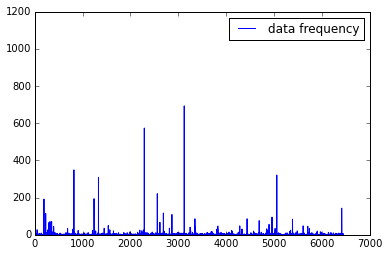

In [44]:
plt.plot(label_y, label = 'data frequency')
plt.legend()
#print(type(label_x[0]))

# Calculation miss count for LRU and proposed Algorithm

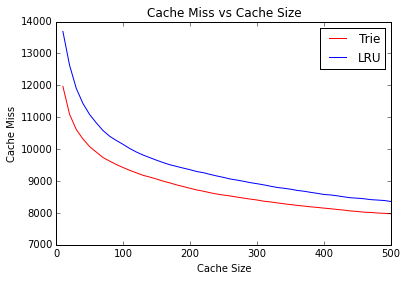

In [43]:
miss_count_trie = []
miss_count_LRU = []
cache_size = []
for cacheSize in range(10, 501, 10):
    global trie_miss_count
    trie_miss_count = 0
    mHeap = MinHeap(cacheSize)
    mTrie = Trie()
    mLRU = LRUCache(cacheSize)
    for word in word_list:
        mTrie.insert(word, word, mHeap)
        mLRU.insertItem(word)
    miss_count_trie.append(trie_miss_count)
    miss_count_LRU.append(mLRU.getMissCount())
    cache_size.append(cacheSize)
    
#print(miss_count_trie)
#print(miss_count_LRU)
#print(cache_size)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Cache Miss vs Cache Size")
ax.set_xlabel("Cache Size")
ax.set_ylabel("Cache Miss")


ax.plot(cache_size, miss_count_trie, color = 'r', label = 'Trie')
ax.plot(cache_size, miss_count_LRU, color = 'b', label = 'LRU')
ax.legend()
#fig.show()